In [65]:
from keras.applications import InceptionV3
IMG_WIDTH = 299
IMG_HEIGHT = 299
LABEL = {'king':0,'ceo':1,'ath':2,'ent':3,'pro':4}
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

In [66]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
_______________________________________________________________________________________

In [67]:
from keras.layers import Dense,GlobalAveragePooling2D,Lambda
from keras.models import Model
from keras.optimizers import Adadelta

MODEL_CLASSES = 5
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
# x = Dropout(0.4)(x)
x = Dense(2048,activation='relu')(x)
for i in range(MODEL_CLASSES):
    hidden = Dense(2048,activation='relu')(x)
king = Dense(1, activation='sigmoid',name='king')(hidden)
print(king)
ceo = Dense(1, activation='sigmoid',name='ceo')(hidden)
ath = Dense(1, activation='sigmoid',name='ath')(hidden)
ent = Dense(1, activation='sigmoid',name='ent')(hidden)
pro = Dense(1, activation='sigmoid',name='pro')(hidden)
# hidden = Dense(2048, activation='relu')(x)
# hidden = Dense(2048, activation='relu')(hidden)
# hidden = Dense(2048, activation='relu')(hidden)
# hidden = Dense(2048, activation='relu')(hidden)
# hidden = Dense(2048, activation='relu')(hidden)
# predictions = Dense(units=MODEL_CLASSES, activation='sigmoid')(hidden )
# output_1 = Lambda(lambda x: x[...,:1])(predictions)
# output_2 = Lambda(lambda x: x[...,1:2])(predictions)
# output_3 = Lambda(lambda x: x[...,2:3])(predictions)
# output_4 = Lambda(lambda x: x[...,3:4])(predictions)
# output_5 = Lambda(lambda x: x[...,4:])(predictions)
model = Model(inputs=base_model.input, outputs=[king,ceo,ath,ent,pro])

adad = Adadelta()

Tensor("king_3/Sigmoid:0", shape=(None, 1), dtype=float32)


In [68]:
for layer in base_model.layers:
    layer.trainable = False

In [69]:
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
model.compile(optimizer=adad, loss=['binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy',],metrics=['accuracy'])

In [70]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

In [71]:
import os
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import scipy.misc
from keras.utils import np_utils

base_dir = 'C:/Users/CPB06GameN/Desktop/ne_deep'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

def load_img(dir):
    x_list = []
    y_list = []
    for file in sorted(os.listdir(dir)):
        x_list.append(image.load_img(os.path.join(dir,file)))
#         tmp = [[0],[0],[0],[0],[0]]
        tmp = [0,0,0,0,0]
#         tmp[LABEL[file.split('_')[0]]] = [1]
        tmp[LABEL[file.split('_')[0]]] = 1
        print(tmp)
        y_list.append(tmp)
    return x_list,y_list

x_train,y_train = load_img(train_dir)
print(y_train)
x_val,y_val = load_img(validation_dir)
x_test,y_test = load_img(test_dir)

y_train = np.asarray(y_train,dtype='float32')
y_val = np.asarray(y_val,dtype='float32')
y_test = np.asarray(y_test,dtype='float32')

# y_train = np_utils.to_categorical(y_train, MODEL_CLASSES)
# y_val = np_utils.to_categorical(y_val, MODEL_CLASSES)
# y_test = np_utils.to_categorical(y_test, MODEL_CLASSES)


def modify_xshape(data):
    new_shape = (IMG_WIDTH,IMG_HEIGHT,3)
    data_new = np.empty(shape=(len(data),)+new_shape)
    for idx in range(len(data)):
        data_new[idx] = scipy.misc.imresize(data[idx], new_shape)
    return data_new

# def modify_yshape(data):
#     new_shape = (MODEL_CLASSES,1)
#     data_new = np.empty(shape=(len(data),)+new_shape)
#     for idx in range(len(data)):
#         data_new[idx] = data[idx].reshape(MODEL_CLASSES,1)
#     return data_new

x_train = modify_xshape(x_train)
x_val = modify_xshape(x_val)
x_test = modify_xshape(x_test)

# y_train = modify_xshape(y_train)
# y_val = modify_xshape(y_val)
# y_test = modify_xshape(y_test)

# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir, 'test')

BATCH_SIZE = 20
EPOCHS = 10

train_datagen = ImageDataGenerator(
    rotation_range=25, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode="nearest")

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1

[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0

[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1

C:\BigData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [72]:
def generate_data_generator(generator, x, y,batch_size=BATCH_SIZE):
    data = generator.flow(x,y,batch_size=batch_size)
    for batch_x,batch_y in data:
        #print(batch_y)
        yield (batch_x,[batch_y[:,i] for i in range(5)])
#     while True:
#         DATA = data.next()
#         yield DATA[0], np.array([DATA[1][0], DATA[1][1], DATA[1][2], DATA[1][3], DATA[1][4]])
#         yield DATA[0], [DATA[1][0][0], DATA[1][0][1], DATA[1][0][2], DATA[1][0][3], DATA[1][0][4]]
# def generate_data_generator(generator, x, y,batch_size=BATCH_SIZE):
#     data = generator.flow(x,y,batch_size=batch_size)
# #     data = generator.flow(x,y)
#     while True:
#         DATA = data.next()
#         yield DATA[0], [DATA[1][0], DATA[1][1], DATA[1][2], DATA[1][3], DATA[1][4]]

In [73]:
a= generate_data_generator(train_datagen,x_train,y_train)
#print(a)

933
933
20 5
[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]


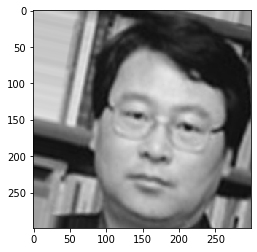

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


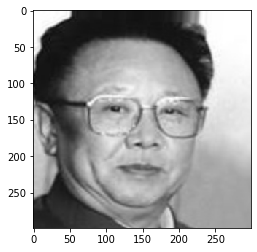

[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.]


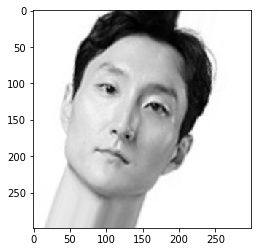

[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


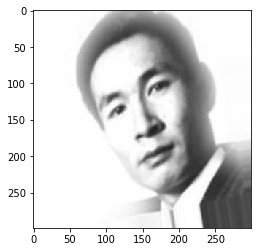

[1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


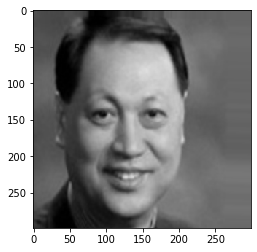

IndexError: list index out of range

In [74]:
import matplotlib.pyplot as plt
print(len(x_train))
print(len(y_train))

for x,y in a:
#     x = data[0]
#     y = data[1]
    print(len(x),len(y))
    for i in range(len(x)):
        print(y[i])
        plt.imshow(x[i])
        plt.show()
    
#     DATA[1][0][0], DATA[1][0][1], DATA[1][0][2], DATA[1][0][3], DATA[1][0][4]
    break
    
#     for i in range(len(xs)):
#         plt.imshow(xs[i])
#         plt.show()
#     print(y)
#     break

In [ ]:
history = model.fit_generator(generator=generate_data_generator(train_datagen,x_train,y_train),
                    steps_per_epoch=len(x_train) / BATCH_SIZE,
                    validation_data=generate_data_generator(test_datagen,x_val,y_val),
                    validation_steps=len(x_val) / BATCH_SIZE,
                    epochs=EPOCHS)
MODEL_FILE = 'inception_v3_face1.h5'

model.save(MODEL_FILE)

Epoch 1/10
47/46 [==============================] - 368s 8s/step - loss: 2.8174 - king_loss: 0.5721 - ceo_loss: 0.5526 - ath_loss: 0.5683 - ent_loss: 0.5941 - pro_loss: 0.5303 - king_accuracy: 0.7867 - ceo_accuracy: 0.7910 - ath_accuracy: 0.7814 - ent_accuracy: 0.7128 - pro_accuracy: 0.7931 - val_loss: 2.7256 - val_king_loss: 0.4640 - val_ceo_loss: 0.5187 - val_ath_loss: 0.7827 - val_ent_loss: 0.5235 - val_pro_loss: 0.5596 - val_king_accuracy: 0.7937 - val_ceo_accuracy: 0.8016 - val_ath_accuracy: 0.8016 - val_ent_accuracy: 0.8016 - val_pro_accuracy: 0.8016
Epoch 2/10
47/46 [==============================] - 393s 8s/step - loss: 2.4088 - king_loss: 0.4377 - ceo_loss: 0.4954 - ath_loss: 0.5022 - ent_loss: 0.5022 - pro_loss: 0.4713 - king_accuracy: 0.8178 - ceo_accuracy: 0.8124 - ath_accuracy: 0.7974 - ent_accuracy: 0.7653 - pro_accuracy: 0.8006 - val_loss: 2.3741 - val_king_loss: 0.4073 - val_ceo_loss: 0.4658 - val_ath_loss: 0.6394 - val_ent_loss: 0.4656 - val_pro_loss: 0.4618 - val_king

In [263]:
# # def extract_features(datagen,x,y):
# #     return datagen.flow(x,y,batch_size=BATCH_SIZE)

# def generate_data_generator(generator,x,y,batch_size=BATCH_SIZE):
#     genX = generator.flow(x, seed=7)
#     genY = generator.flow(y1, seed=7)
#     while True:
#             Xi = genX.next()
#             Yi1 = genY1.next()
#             Yi2 = function(Y2)
#             yield Xi, [Yi1, Yi2]

# def batch_generator(x, y, batch_size=BATCH_SIZE):
#     genX = generator.flow(x, seed=7)
#     genY = generator.flow(y, seed=7)
#     for i in np.arange(0, x.shape[0], batch_size):
#         X=x[perm[i:i+size]]
#         y=y[perm[i:i+size]]
#         yield(X, {'conv10': y, 'seg_1': y, 'seg_2': y, 'seg_3': y, 'seg_4': y, 'seg_5': y, 'seg_6': y, 'seg_7': y,'seg_8': y })

    
#     ....generate batch batch of size: batch_size 
#     yield (X_batch, {'output1': y1, 'output2': y2} )
            
# # train_generator = extract_features(train_datagen,x_train,y_train)
# # valid_generator = extract_features(test_datagen,x_val,y_val)
# # test_generator = extract_features(test_datagen,x_test,y_test)



In [59]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

king


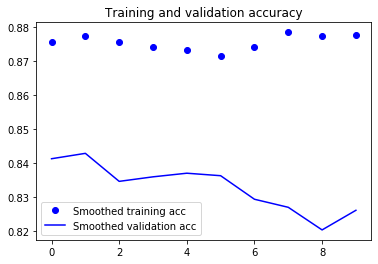

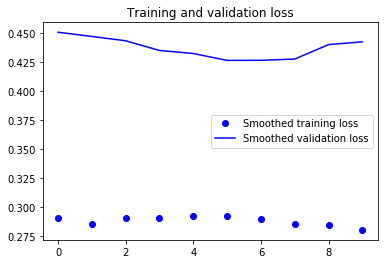

ceo


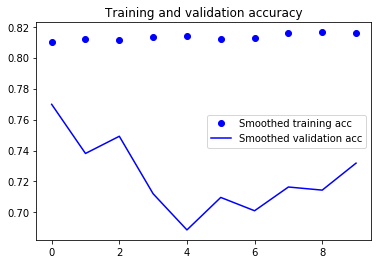

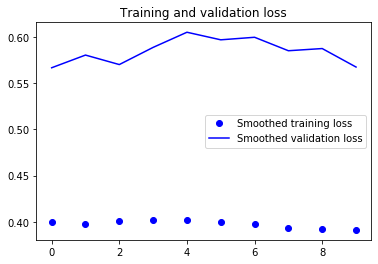

ath


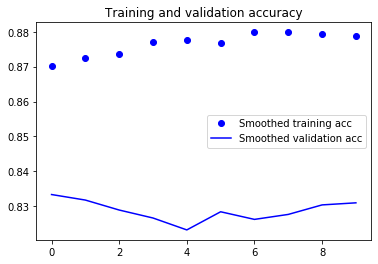

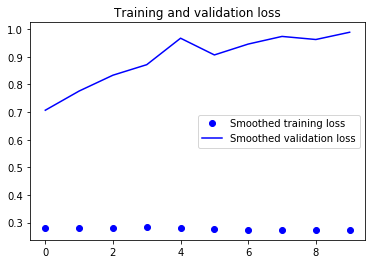

ent


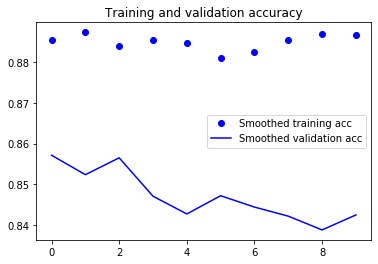

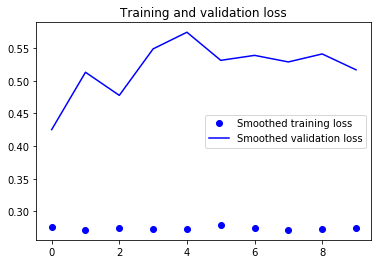

pro


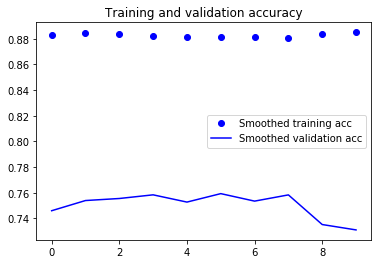

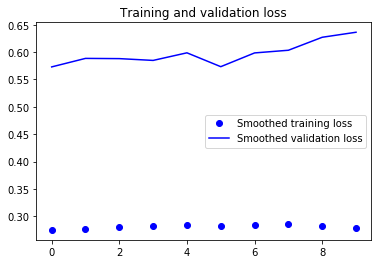

In [64]:
for i in ['king','ceo','ath','ent','pro']:
    print(i)
    acc = history.history[i+'_accuracy']
    val_acc = history.history['val_'+i+'_accuracy']
    loss = history.history[i+'_loss']
    val_loss = history.history['val_'+i+'_loss']

    epochs = range(len(acc))

    plt.plot(epochs,
             smooth_curve(acc), 'bo', label='Smoothed training acc')
    plt.plot(epochs,
             smooth_curve(val_acc), 'b', label='Smoothed validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs,
             smooth_curve(loss), 'bo', label='Smoothed training loss')
    plt.plot(epochs,
             smooth_curve(val_loss), 'b', label='Smoothed validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [48]:
from keras.models import load_model
model = load_model('./inception_v3_face1.h5')

In [49]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [50]:
for layer in model.layers:
    print(layer.output_shape)

(None, 299, 299, 3)
(None, 149, 149, 32)
(None, 149, 149, 32)
(None, 149, 149, 32)
(None, 147, 147, 32)
(None, 147, 147, 32)
(None, 147, 147, 32)
(None, 147, 147, 64)
(None, 147, 147, 64)
(None, 147, 147, 64)
(None, 73, 73, 64)
(None, 73, 73, 80)
(None, 73, 73, 80)
(None, 73, 73, 80)
(None, 71, 71, 192)
(None, 71, 71, 192)
(None, 71, 71, 192)
(None, 35, 35, 192)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 192)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 96)
(None, 35, 35, 32)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 96)
(None, 35, 35, 32)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 96)
(None, 35, 35, 32)
(None, 35, 35, 256)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 256)
(None

C:\BigData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


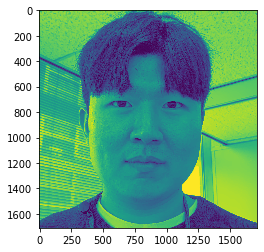

대군의 얼굴을 하고 계시네요


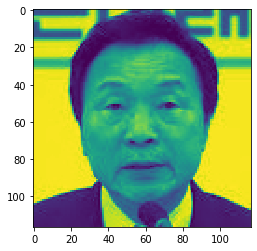

문과에 급제할 상이구나


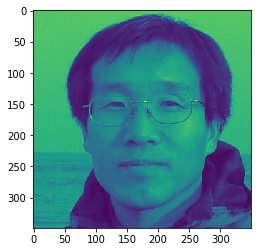

문과에 급제할 상이구나


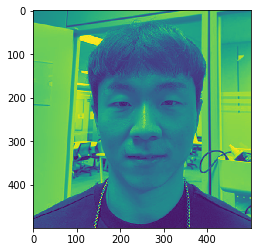

문과에 급제할 상이구나


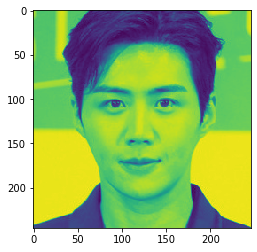

문과에 급제할 상이구나


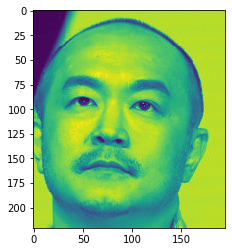

문과에 급제할 상이구나


In [63]:
import os
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import scipy.misc
from keras.utils import np_utils
import matplotlib.image as img

def load_img(dir):
    x = image.load_img(dir)
    return [x,]
def modify_xshape(data):
    new_shape = (299,299,3)
    data_new = np.empty(shape=(len(data),)+new_shape)
    for idx in range(len(data)):
        data_new[idx] = scipy.misc.imresize(data[idx], new_shape)
    return data_new


def prin(x):
    if (x.index(max(x)))==0:
        print("대군의 얼굴을 하고 계시네요")
    elif (x.index(max(x)))==1:
        print("거상이 될 상이구나.")
    elif (x.index(max(x)))==2:
        print("무관이 될 상이로다")
    elif (x.index(max(x)))==3:
        print("너 광대로구나")
    else:
        print("문과에 급제할 상이구나")

def predic(pic):
    temp=model.predict(modify_xshape(load_img(pic)))
    #print(temp)
    picture=img.imread(pic)
    plt.imshow(picture)
    plt.show()
    return prin(temp)

def sho(pic):
    picture=img.imread(pic)
    plt.imshow(picture)
    plt.show()

    
one='C:/Users/CPB06GameN/Documents/asd_1.jpg'
two='C:/Users/CPB06GameN/Documents/aaa.jpg'
thr='C:/Users/CPB06GameN/Documents/mmm.jpg'
fo='C:/Users/CPB06GameN/Documents/nnn.jpg'
fi='C:/Users/CPB06GameN/Documents/kkk.jpg'
si='C:/Users/CPB06GameN/Documents/yyy.jpg'
se='C:/Users/CPB06GameN/Documents/bbb.jpg'

predic(one)
predic(two)
predic(thr)
predic(fo)
predic(fi)
predic(si)
predic(se)
    